# **Project Name : ✨ Email Spam Detection ✨**

AUTHOR : **Jamshed Butt** from **Data Science**

# **Import Libraries**

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve
from sklearn.metrics._plot.roc_curve import auc

# **Load Dataset**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/smsspamcollection.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.shape

(5572, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


# **EDA (Exploratory data analysis)**

In [7]:
df["label"].unique()

array(['ham', 'spam'], dtype=object)

In [8]:
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

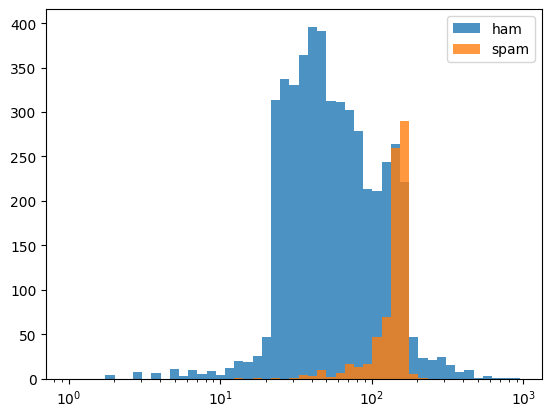

In [9]:
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label'] == 'ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label'] == 'spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

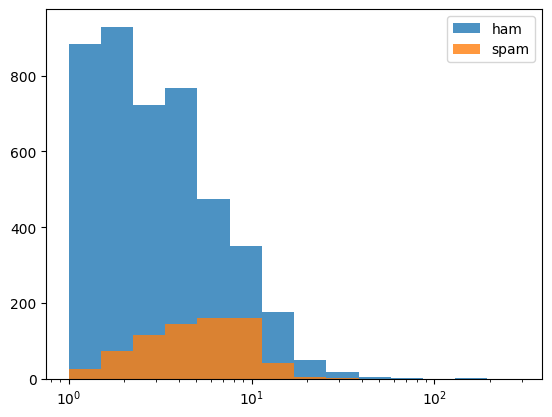

In [10]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label'] == 'ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label'] == 'spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

#### **Spliting Data into Train and Test**

In [11]:
X = df["message"]
Y = df["label"]

train_data,test_data,train_label,test_label = train_test_split(X, Y, test_size=0.30, random_state=42)

In [21]:
print("train_data: ",train_data.shape)
print("train_label: ",train_label.shape)
print("test_data: ",test_data.shape)
print("test_label: ",test_label.shape)

train_data:  (3900,)
train_label:  (3900,)
test_data:  (1672,)
test_label:  (1672,)


# **Model**

#### **Logistic Regression**

In [40]:
model_lr = Pipeline([("tfidf",TfidfVectorizer()),
                           ("model",LogisticRegression())])

In [41]:
model_lr.fit(train_data,train_label)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('model', LogisticRegression())])

In [43]:
y_pred = model_lr.predict(test_data)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

In [44]:
print("Train Accuracy Score : ",model_lr.score(train_data,train_label))
print("Test Accuracy Score : ",accuracy_score(y_pred,test_label))

Train Accuracy Score :  0.9725641025641025
Test Accuracy Score :  0.9712918660287081


In [45]:
cm = pd.DataFrame(confusion_matrix(y_pred,test_label),index=["ham","spam"], columns=["ham","spam"])
cm

,ham,spam
ham,1446,46
spam,2,178


In [46]:
print(classification_report(y_pred,test_label))

              precision    recall  f1-score   support

         ham       1.00      0.97      0.98      1492
        spam       0.79      0.99      0.88       180

    accuracy                           0.97      1672
   macro avg       0.90      0.98      0.93      1672
weighted avg       0.98      0.97      0.97      1672



In [47]:
print("Corss _Val_Score Train Data : ",cross_val_score(model_lr,train_data,train_label,cv=5).mean())
print("Corss _Val_Score Test Data : ",cross_val_score(model_lr,test_data,test_label,cv=5).mean())

Corss _Val_Score Train Data :  0.961025641025641
Corss _Val_Score Test Data :  0.9342193225489319


#### **MultinomialNB Model**

In [27]:
model_nb = Pipeline([("tfidf",TfidfVectorizer()),
                           ("model",MultinomialNB())])

In [29]:
model_nb.fit(train_data,train_label)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('model', MultinomialNB())])

In [30]:
y_pred_2 = model_nb.predict(test_data)
y_pred_2

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype='<U4')

In [33]:
print("Train Accuracy Score : ",model_nb.score(train_data,train_label))
print("Test Accuracy Score : ",accuracy_score(y_pred_2,test_label))

Train Accuracy Score :  0.9707692307692307
Test Accuracy Score :  0.9629186602870813


In [59]:
cm_2 = pd.DataFrame(confusion_matrix(y_pred_2,test_label),index=["ham","spam"], columns=["ham","spam"])
cm_2

,ham,spam
ham,1446,46
spam,2,178


In [58]:
print(classification_report(y_pred_2,test_label))

              precision    recall  f1-score   support

         ham       1.00      0.97      0.98      1492
        spam       0.79      0.99      0.88       180

    accuracy                           0.97      1672
   macro avg       0.90      0.98      0.93      1672
weighted avg       0.98      0.97      0.97      1672



In [35]:
print("Corss _Val_Score Train Data : ",cross_val_score(model_nb,train_data,train_label,cv=5).mean())
print("Corss _Val_Score Test Data : ",cross_val_score(model_nb,test_data,test_label,cv=5).mean())

Corss _Val_Score Train Data :  0.9497435897435897
Corss _Val_Score Test Data :  0.9294324783269282


#### **KNeighborsClassifier Model**

In [50]:
model_knn = Pipeline([("tfidf",TfidfVectorizer()),
                           ("model",KNeighborsClassifier(n_neighbors=5))])

In [51]:
model_knn.fit(train_data,train_label)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('model', KNeighborsClassifier())])

In [52]:
y_pred_3 = model_knn.predict(test_data)
y_pred_3

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [53]:
print("Train Accuracy Score : ",model_nb.score(train_data,train_label))
print("Test Accuracy Score : ",accuracy_score(y_pred_3,test_label))

Train Accuracy Score :  0.9707692307692307
Test Accuracy Score :  0.9078947368421053


In [54]:
cm_3 = pd.DataFrame(confusion_matrix(y_pred_3,test_label),index=["ham","spam"], columns=["ham","spam"])
cm_3

,ham,spam
ham,1448,154
spam,0,70


In [56]:
print(classification_report(y_pred_3,test_label))

              precision    recall  f1-score   support

         ham       1.00      0.90      0.95      1602
        spam       0.31      1.00      0.48        70

    accuracy                           0.91      1672
   macro avg       0.66      0.95      0.71      1672
weighted avg       0.97      0.91      0.93      1672



In [57]:
print("Corss _Val_Score Train Data : ",cross_val_score(model_knn,train_data,train_label,cv=5).mean())
print("Corss _Val_Score Test Data : ",cross_val_score(model_knn,test_data,test_label,cv=5).mean())

Corss _Val_Score Train Data :  0.9248717948717948
Corss _Val_Score Test Data :  0.9641201179730092
